In [41]:
#In this assignment, students will be using the K-nearest neighbors
#algorithm to predict how many points NBA players scored in the 2013-2014
#season.
#A look at the data
#Before we dive into the algorithm, let’s take a look at our data. Each row in
the data contains information on how a player performed in the 2013-2014
NBA season.
Download 'nba_2013.csv' file from this link:
https://www.dropbox.com/s/b3nv38jjo5dxcl6/nba_2013.csv?dl=0
Here are some selected columns from the data:
player - name of the player
pos - the position of the player
g - number of games the player was in
gs - number of games the player started
pts - total points the player scored
There are many more columns in the data, mostly containing information
about average player game performance over the course of the season.
See this site for an explanation of the rest of them.
We can read our dataset in and figure out which columns are present:

import pandas
with open("nba_2013.csv", 'r') as csvfile:
nba = pandas.read_csv(csvfile)

NOTE:ThesolutionsharedthroughGithubshouldcontainthesource

SyntaxError: invalid syntax (<ipython-input-41-48524e3eb70e>, line 6)

In [115]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [116]:
with open("nba_2013.csv", 'r') as csvfile:
    nba = pd.read_csv(csvfile)
    nba

In [117]:
print(nba.columns.values)

['player' 'pos' 'age' 'bref_team_id' 'g' 'gs' 'mp' 'fg' 'fga' 'fg.' 'x3p'
 'x3pa' 'x3p.' 'x2p' 'x2pa' 'x2p.' 'efg.' 'ft' 'fta' 'ft.' 'orb' 'drb'
 'trb' 'ast' 'stl' 'blk' 'tov' 'pf' 'pts' 'season' 'season_end'
 'Unnamed: 31']


In [118]:
nba.isnull().any()

player          False
pos             False
age             False
bref_team_id    False
g               False
gs              False
mp              False
fg              False
fga             False
fg.              True
x3p             False
x3pa            False
x3p.             True
x2p             False
x2pa            False
x2p.             True
efg.             True
ft              False
fta             False
ft.              True
orb             False
drb             False
trb             False
ast             False
stl             False
blk             False
tov             False
pf              False
pts             False
season          False
season_end      False
Unnamed: 31      True
dtype: bool

In [119]:
nba["fg."].fillna(nba["fg."].mean(),inplace=True)
nba["x2p."].fillna(nba["x2p."].mean(),inplace=True)
nba["efg."].fillna(nba["efg."].mean(),inplace=True)
nba["x3p."].fillna(nba["x3p."].mean(),inplace=True)
nba["ft."].fillna(nba["ft."].mean(),inplace=True)

In [120]:
distance_columns = ['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts']
nba_numeric = nba[distance_columns]

In [121]:
nba_normalized = nba_numeric.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [122]:
nba_normalized

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,0.20,0.756098,0.000000,0.271067,0.077739,0.083531,0.468,0.015326,0.024390,0.266667,...,0.660,0.163636,0.183908,0.193896,0.038835,0.120419,0.118721,0.101695,0.446886,0.065947
1,0.05,0.975610,0.243902,0.383211,0.109541,0.109597,0.503,0.000000,0.000000,0.285111,...,0.581,0.322727,0.242656,0.298025,0.059639,0.209424,0.260274,0.240678,0.743590,0.102198
2,0.40,0.634146,0.146341,0.307594,0.168433,0.162915,0.520,0.000000,0.000000,0.285111,...,0.639,0.231818,0.260536,0.274686,0.052705,0.125654,0.164384,0.132203,0.395604,0.139607
3,0.45,0.878049,0.890244,0.817366,0.546525,0.598934,0.459,0.490421,0.487805,0.426667,...,0.815,0.072727,0.293742,0.235189,0.343967,0.183246,0.013699,0.494915,0.498168,0.512919
4,0.30,0.670732,0.365854,0.304390,0.160188,0.147512,0.546,0.000000,0.001626,0.000000,...,0.836,0.213636,0.233716,0.248654,0.055479,0.120419,0.210046,0.213559,0.684982,0.126494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,0.05,0.865854,0.195122,0.565203,0.406360,0.478673,0.427,0.153257,0.305691,0.212766,...,0.641,0.156818,0.203065,0.204668,0.300971,0.408377,0.073059,0.691525,0.553114,0.362129
477,0.45,0.768293,0.109756,0.579622,0.455830,0.526659,0.435,0.517241,0.569106,0.385714,...,0.825,0.065909,0.174968,0.149013,0.131761,0.240838,0.054795,0.322034,0.571429,0.441188
478,0.30,0.951220,0.951220,0.870554,0.685512,0.760071,0.454,0.344828,0.474797,0.308219,...,0.712,0.377273,0.395913,0.427289,0.252427,0.874346,0.164384,0.559322,0.780220,0.546471
479,0.10,0.987805,0.036585,0.453380,0.202591,0.239336,0.426,0.000000,0.001626,0.000000,...,0.730,0.268182,0.300128,0.316876,0.127601,0.209424,0.187215,0.294915,0.622711,0.188970


In [123]:
nba_category = nba[['player', 'bref_team_id', 'season']]

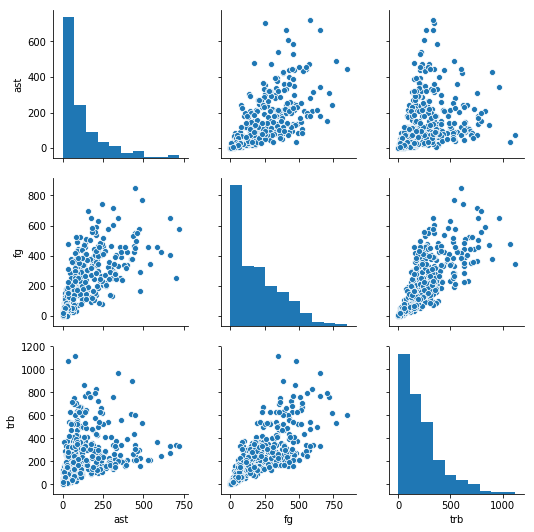

In [124]:
sns.pairplot(nba[["ast", "fg", "trb"]])
plt.show()

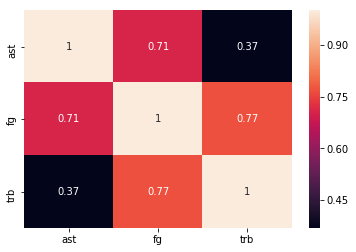

In [125]:
correlation = nba[["ast", "fg", "trb"]].corr()
sns.heatmap(correlation, annot=True)

In [126]:
kmeans_model = KMeans(n_clusters=5, random_state=1)
good_columns = nba._get_numeric_data().dropna(axis=1)
kmeans_model.fit(good_columns)
labels = kmeans_model.labels_
labels

array([0, 0, 0, 3, 0, 2, 3, 0, 4, 4, 4, 2, 4, 4, 1, 0, 4, 3, 2, 0, 1, 2,
       0, 0, 1, 2, 0, 2, 2, 2, 4, 4, 1, 4, 2, 1, 4, 3, 4, 2, 0, 3, 0, 1,
       0, 4, 2, 2, 0, 4, 4, 4, 4, 2, 2, 4, 0, 4, 1, 3, 1, 4, 1, 2, 4, 2,
       2, 2, 2, 0, 2, 1, 1, 4, 1, 2, 2, 0, 0, 0, 1, 4, 2, 1, 1, 3, 4, 1,
       4, 1, 2, 2, 0, 2, 2, 4, 2, 1, 0, 3, 2, 3, 2, 2, 1, 1, 0, 4, 2, 2,
       3, 4, 2, 2, 2, 3, 0, 4, 2, 2, 2, 0, 1, 3, 1, 0, 0, 0, 3, 3, 4, 1,
       1, 3, 2, 2, 3, 2, 0, 0, 1, 1, 0, 2, 1, 2, 4, 2, 4, 4, 1, 2, 2, 0,
       1, 0, 0, 0, 1, 1, 3, 0, 3, 1, 4, 2, 2, 2, 2, 2, 1, 3, 0, 2, 4, 4,
       1, 3, 0, 3, 2, 0, 2, 0, 4, 3, 4, 2, 2, 0, 2, 2, 2, 1, 0, 1, 0, 3,
       1, 0, 1, 1, 1, 4, 1, 4, 2, 1, 0, 2, 2, 0, 3, 0, 4, 3, 4, 4, 3, 2,
       1, 1, 2, 2, 2, 3, 2, 2, 2, 3, 1, 2, 3, 0, 1, 0, 0, 3, 2, 1, 2, 2,
       0, 2, 1, 1, 0, 0, 1, 2, 4, 4, 0, 3, 1, 4, 2, 2, 0, 4, 2, 2, 1, 2,
       1, 3, 2, 1, 2, 0, 0, 2, 3, 1, 4, 0, 1, 3, 3, 2, 4, 0, 1, 4, 0, 0,
       1, 2, 3, 2, 2, 4, 0, 0, 2, 2, 1, 1, 1, 2, 1,

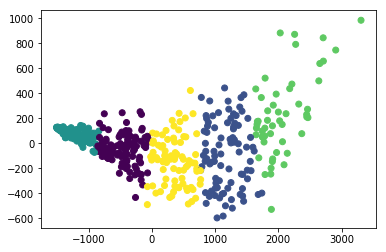

In [127]:

pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(good_columns)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
plt.show()

In [128]:
plot_columns

array([[-6.27969797e+02, -1.30839787e+02],
       [-2.44268599e+02, -2.04096215e+02],
       [-3.38828830e+02,  5.78890285e+01],
       [ 1.74969229e+03,  5.08745891e+01],
       [-3.83105778e+02,  4.99999553e+00],
       [-1.13423593e+03,  6.09156004e+01],
       [ 2.25796630e+03,  8.72646979e+02],
       [-2.74018476e+02, -4.91584194e+01],
       [ 6.51594159e+02, -3.68598302e+02],
       [ 2.80257365e+01,  4.17704568e+00],
       [ 7.72722371e+02, -2.88996030e+02],
       [-1.30782658e+03,  7.78270066e+01],
       [ 7.46758648e+01, -1.13379443e+02],
       [ 4.27602952e+02, -3.54396263e+02],
       [ 1.11065367e+03, -4.05383401e+02],
       [-4.74415272e+02,  9.09308321e+01],
       [ 5.49938149e+02, -3.57592546e+02],
       [ 2.90757493e+03,  7.46898874e+02],
       [-1.31941706e+03,  6.64245196e+01],
       [-4.21874638e+02, -7.17577345e+01],
       [ 1.68210924e+03, -4.08218513e+02],
       [-1.39428554e+03,  1.10713698e+02],
       [-1.22831504e+02, -1.78978756e+01],
       [-4.

In [129]:
# Find player LeBron
LeBron = good_columns.loc[ nba['player'] == 'LeBron James',: ]

#Find player Durant
Durant = good_columns.loc[ nba['player'] == 'Kevin Durant',: ]

#print the players
print(LeBron)
print(Durant)

     age   g  gs    mp   fg   fga    fg.  x3p  x3pa      x3p.  ...  orb  drb  \
225   29  77  77  2902  767  1353  0.567  116   306  0.379085  ...   81  452   

     trb  ast  stl  blk  tov   pf   pts  season_end  
225  533  488  121   26  270  126  2089        2013  

[1 rows x 27 columns]
     age   g  gs    mp   fg   fga    fg.  x3p  x3pa      x3p.  ...  orb  drb  \
133   25  81  81  3122  849  1688  0.503  192   491  0.391039  ...   58  540   

     trb  ast  stl  blk  tov   pf   pts  season_end  
133  598  445  103   59  285  174  2593        2013  

[1 rows x 27 columns]


In [130]:
#Change the dataframes to a list 
Lebron_list = LeBron.values.tolist()
Durant_list = Durant.values.tolist()

#Predict which group LeBron James and Kevin Durant belongs
LeBron_Cluster_Label = kmeans_model.predict(Lebron_list)
Durant_Cluster_Label = kmeans_model.predict(Durant_list)

print(LeBron_Cluster_Label)
print(Durant_Cluster_Label)

[3]
[3]


In [131]:
print("Model putting both LeBron and Durant in Cluster Label 3");

Model putting both LeBron and Durant in Cluster Label 3


In [132]:
nba.corr(); #Sample of all of the column correlations with each other. Highlighting the correlation between pts & mp


In [133]:
# lets see prediction.
x_columns = nba[['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf']]

# The column that we want to predict.
y_column = nba["pts"]

x_train, x_test, y_train, y_test = train_test_split(x_columns, y_column, test_size=0.3, random_state=0)

In [134]:
# check for increasing neighbour values to see which has the highest regression score

for k in range(10):
    k_value = k + 1
    knn = KNeighborsRegressor(n_neighbors = k_value)
    

In [135]:
    knn

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=10, p=2,
          weights='uniform')

In [136]:
    knn.fit(x_train, y_train) 
    y_pred = knn.predict(x_test)
    print ("Regression score is:",format(metrics.r2_score(y_test, y_pred),'.4f'), "for k_value:", k_value)

Regression score is: 0.9749 for k_value: 10


In [137]:
knn = KNeighborsRegressor(n_neighbors = 8)
knn.fit(x_train, y_train) 
y_pred = knn.predict(x_test)
print ("MSE is:", format(metrics.mean_squared_error(y_test, y_pred), '.7f'))
print ("Regression score is:", format(metrics.r2_score(y_test, y_pred),'.4f'))

MSE is: 4399.5556034
Regression score is: 0.9770


In [138]:
Test_With_Predicted = pd.DataFrame({'Actual Points': y_test.tolist(), 'Predicted Points': y_pred.tolist()})
Test_With_Predicted

,Actual Points,Predicted Points
0,436,323.500
1,717,665.125
2,1096,1052.000
3,19,10.250
4,988,940.875
...,...,...
140,1107,1094.500
141,35,23.500
142,810,820.625
143,796,780.875


In [139]:
#Create the Linear Regression Model
from sklearn.linear_model import LinearRegression
lr = LinearRegression() 
lr.fit(x_train, y_train)
predictions = lr.predict(x_test) #Make predictions on the test data
print("prediction with lienearregration is",predictions)
print(y_test)

prediction with lienearregration is [ 4.36000000e+02  7.17000000e+02  1.09600000e+03  1.90000000e+01
  9.88000000e+02  4.16000000e+02  2.61000000e+02  7.03000000e+02
  8.30000000e+01  2.50000000e+01  1.13400000e+03  6.60000000e+01
  9.90000000e+01  2.60000000e+01  4.72000000e+02  2.08900000e+03
  1.36000000e+02  1.60000000e+01  1.24900000e+03  7.80000000e+01
  2.02000000e+02  1.53000000e+02  8.56000000e+02  1.07000000e+03
  4.95000000e+02  1.43000000e+02 -3.56006338e-13  1.14400000e+03
  1.13100000e+03  9.44000000e+02  1.49000000e+02  4.77000000e+02
  6.22000000e+02  2.13000000e+02  1.02100000e+03  1.93000000e+03
  3.41000000e+02 -3.62391642e-13  2.20000000e+01  3.20000000e+01
  5.72000000e+02  4.85000000e+02  5.46000000e+02  1.50000000e+01
  2.00000000e+00  2.65000000e+02  4.35000000e+02  9.70000000e+01
  9.80000000e+01  7.30000000e+01  1.73000000e+02  6.96000000e+02
  3.60000000e+01  9.29000000e+02  7.15000000e+02  2.50000000e+01
  3.84000000e+02 -3.53888445e-13  5.20000000e+02  1.24

In [140]:
lr_confidence = lr.score(x_test, y_test)
print("lr confidence (R^2): ", lr_confidence)


from sklearn.metrics import mean_squared_error
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, predictions))

lr confidence (R^2):  1.0
Mean Squared Error (MSE):  4.750776812558073e-25
